In [1]:
%pylab inline
from scipy.fftpack import dst, idst, dct, idct, fft, ifft, fftfreq

Populating the interactive namespace from numpy and matplotlib


# Fourier Spectral Methods

### Periodic Domains (fft)

In [2]:
help(ifft)

Help on function ifft in module scipy.fftpack.basic:

ifft(x, n=None, axis=-1, overwrite_x=False)
    Return discrete inverse Fourier transform of real or complex sequence.
    
    The returned complex array contains ``y(0), y(1),..., y(n-1)`` where
    
    ``y(j) = (x * exp(2*pi*sqrt(-1)*j*np.arange(n)/n)).mean()``.
    
    Parameters
    ----------
    x : array_like
        Transformed data to invert.
    n : int, optional
        Length of the inverse Fourier transform.  If ``n < x.shape[axis]``,
        `x` is truncated.  If ``n > x.shape[axis]``, `x` is zero-padded.
        The default results in ``n = x.shape[axis]``.
    axis : int, optional
        Axis along which the ifft's are computed; the default is over the
        last axis (i.e., ``axis=-1``).
    overwrite_x : bool, optional
        If True, the contents of `x` can be destroyed; the default is False.
    
    Returns
    -------
    ifft : ndarray of floats
        The inverse discrete Fourier transform.
    
    S

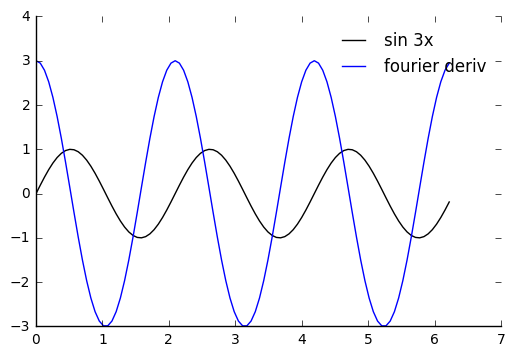

In [3]:
n = 99
N = (99 -1) /2
x = arange(n)/n * 2*pi
y = sin(3 * x)
k = fftfreq((n), 1/(n))
plot(x,y,label="sin 3x")

dy = real(ifft(fft(y) * k * 1j ))
plot(x,dy, label="fourier deriv")
legend()

### Neumann/Dirichclet Boundary Conditions (dct, dst)

Fourier derivative doesn't work near boundaries, so we have to use Sin/Cos basis, which is more difficult to use

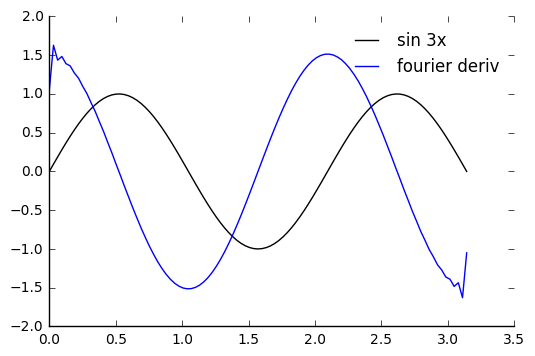

In [4]:
n = 100
x = arange(n+1)/n * pi
y = sin(3*x)


dy = real(ifft(fft(y) * fftfreq(n+1, 1/(n+1)) * 1j ))

plot(x,y, label='sin 3x')
plot(x,dy, label="fourier deriv")
legend()

In [5]:
help(dst)

Help on function dst in module scipy.fftpack.realtransforms:

dst(x, type=2, n=None, axis=-1, norm=None, overwrite_x=False)
    Return the Discrete Sine Transform of arbitrary type sequence x.
    
    Parameters
    ----------
    x : array_like
        The input array.
    type : {1, 2, 3}, optional
        Type of the DST (see Notes). Default type is 2.
    n : int, optional
        Length of the transform.  If ``n < x.shape[axis]``, `x` is
        truncated.  If ``n > x.shape[axis]``, `x` is zero-padded. The
        default results in ``n = x.shape[axis]``.
    axis : int, optional
        Axis along which the dst is computed; the default is over the
        last axis (i.e., ``axis=-1``).
    norm : {None, 'ortho'}, optional
        Normalization mode (see Notes). Default is None.
    overwrite_x : bool, optional
        If True, the contents of `x` can be destroyed; the default is False.
    
    Returns
    -------
    dst : ndarray of reals
        The transformed input array.
 

Which of the three DST types looks like it can be written as $f(x) = \sum_k sin(x k)$? 

By the way, there are also three DCTs:

In [6]:
help(dct)

Help on function dct in module scipy.fftpack.realtransforms:

dct(x, type=2, n=None, axis=-1, norm=None, overwrite_x=False)
    Return the Discrete Cosine Transform of arbitrary type sequence x.
    
    Parameters
    ----------
    x : array_like
        The input array.
    type : {1, 2, 3}, optional
        Type of the DCT (see Notes). Default type is 2.
    n : int, optional
        Length of the transform.  If ``n < x.shape[axis]``, `x` is
        truncated.  If ``n > x.shape[axis]``, `x` is zero-padded. The
        default results in ``n = x.shape[axis]``.
    axis : int, optional
        Axis along which the dct is computed; the default is over the
        last axis (i.e., ``axis=-1``).
    norm : {None, 'ortho'}, optional
        Normalization mode (see Notes). Default is None.
    overwrite_x : bool, optional
        If True, the contents of `x` can be destroyed; the default is False.
    
    Returns
    -------
    y : ndarray of real
        The transformed input array.
  

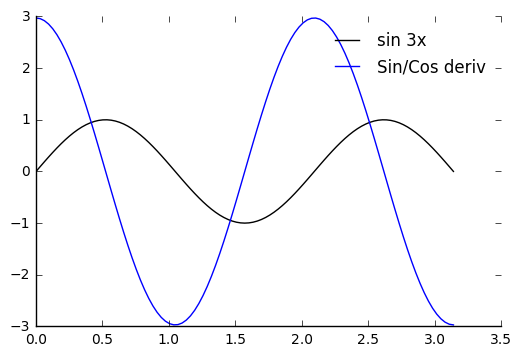

In [7]:
# remove end points
yy = y[1:-1]

# idst type-1
y_dst = idst(yy, type=1)

# take deriv
dy_dct = arange(1,len(y_dst)+1) * y_dst

# dct type-1 needs boundaries
dy_dct = hstack((0, dy_dct, 0))

# need to normalize properly
# normalization is not handled automatically
# in other words:
#    dst(idst(x)) != x
dy = dct(dy_dct, type=1)/dy_dct.shape[0]/2

plot(x,y, label='sin 3x')
plot(x,dy, label='Sin/Cos deriv')
legend()

# Finite differencing for Barotropic Equations

$$ \zeta_t + J(\psi, \zeta) = 0 $$
$$ \Delta \psi = \zeta$$

The variable are defined by
$$\nabla \psi = (-u, v)$$
$$ J(a,b) = b_x a_y - a_x b_y$$ 

This jacobian is hard to approximate, and Arakawa (1966) is a famous finite difference scheme.

In [8]:
%%bash

open /Users/noah/Dropbox/Papers/Journal\ Article/Arakawa_1966_Computational\ design\ for\ long-term\ numerical\ integration\ of\ the\ equations\ of.pdf  /Users/noah/Dropbox/Papers/Journal\ Article/Fix_1975_Finite\ Element\ Models\ for\ Ocean\ Circulation\ Problems.pdf /Users/noah/Dropbox/Papers/Journal\ Article/Jespersen_1974_Arakawa\'s\ method\ is\ a\ finite-element\ method.pdf /Users/noah/Dropbox/Papers/Journal\ Article/Naulin_Nielsen_2003_Accuracy\ of\ Spectral\ and\ Finite\ Difference\ Schemes\ in\ 2D\ Advection\ Problems.pdf

# Demonstration

Spectral code
```
python -m gnl.pdes.barotropic_spec
```

FD code
```
python -m gnl.pdes.barotropic_fd_par
```

In [9]:
!open -a ITerm.app